<a href="https://colab.research.google.com/github/Cherryberry112/CSE475_Machine_Learning-/blob/main/Lab/Lab02_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup & Styling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Set a customized pastel theme
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams.update({
    "figure.figsize": (7,5),
    "axes.titlesize": 14,
    "axes.labelsize": 11
})

# Load Dataset

In [3]:
# Download dataset
!gdown --id 1Q6pdhzWFu2oegWMPvrOE8dWTra8FJsTf

# Read CSV
df = pd.read_csv("Mall_Customers.csv")

df.head(10)


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:139: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Q6pdhzWFu2oegWMPvrOE8dWTra8FJsTf
To: /content/Mall_Customers.csv
100% 3.98k/3.98k [00:00<00:00, 17.0MB/s]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Basic Exploration

In [4]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# Rename columns for convenience
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Feature Selection & Scaling

In [5]:
features = ['annual_income_(k$)', 'spending_score_(1-100)']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for Visualization (2D)

Explained Variance → PC1: 50.50%, PC2: 49.50%


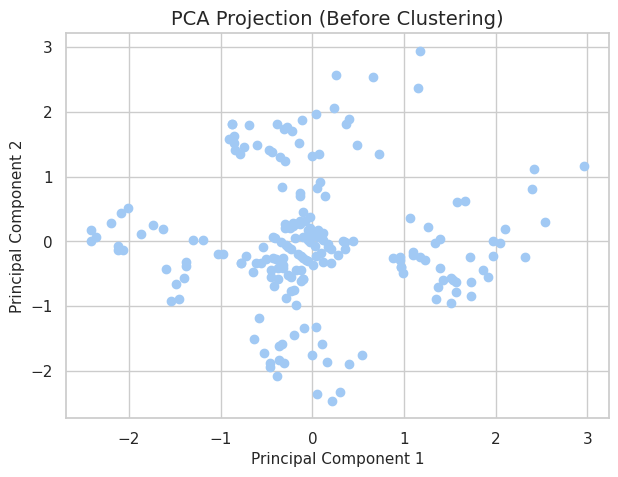

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Explained variance
explained_var = pca.explained_variance_ratio_ * 100
print(f"Explained Variance → PC1: {explained_var[0]:.2f}%, PC2: {explained_var[1]:.2f}%")

# PCA scatter BEFORE clustering (visual output)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA Projection (Before Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
